<a href="https://colab.research.google.com/github/kaivalyagnik/ml-practice-portfolio/blob/main/heart_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns

path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")

# getting an overview of the data
data = pd.read_csv(path + "/heart.csv")
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


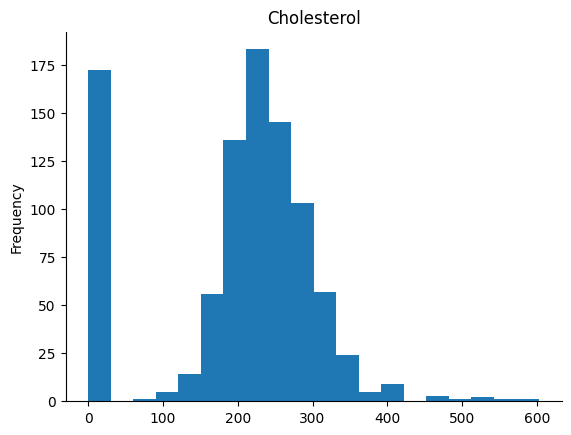

In [2]:
# Cholesterol

from matplotlib import pyplot as plt
data['Cholesterol'].plot(kind='hist', bins=20, title='Cholesterol')
plt.gca().spines[['top', 'right',]].set_visible(False)

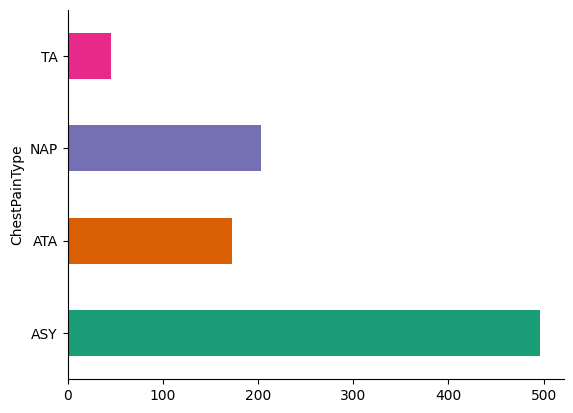

In [3]:
# ChestPainType

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('ChestPainType').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

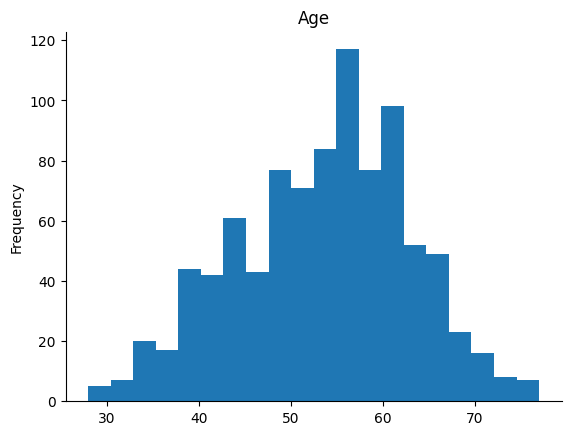

In [4]:
# Age

from matplotlib import pyplot as plt
data['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
"class distribution:", data['HeartDisease'].value_counts()

('class distribution:',
 HeartDisease
 1    508
 0    410
 Name: count, dtype: int64)

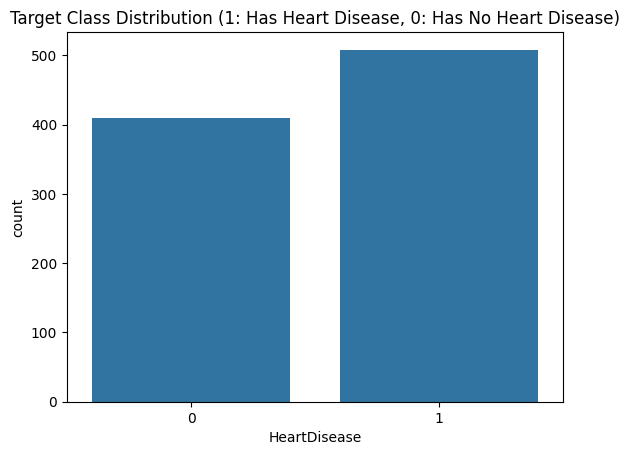

In [7]:
sns.countplot(x="HeartDisease", data=data)
plt.title("Target Class Distribution (1: Has Heart Disease, 0: Has No Heart Disease)")
plt.show()

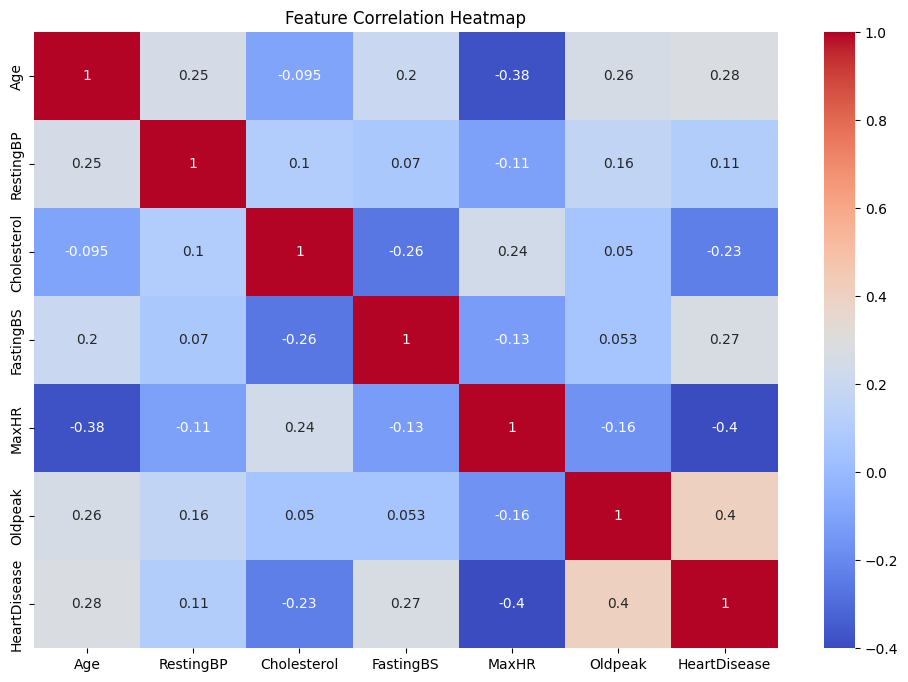

In [8]:
plt.figure(figsize=(12, 8))
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=np.number)
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [9]:
#importing all the required libraries

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline

In [10]:
# define categorical and numerical features

categorical_cols = data.select_dtypes(include='object').columns.to_list()
numerical_cols = data.select_dtypes(include=[np.number]).columns.to_list()

In [11]:
# define categorical and numerical features
# Ensure 'HeartDisease' is not in the list of features used for preprocessing
categorical_cols = data.select_dtypes(include='object').columns.to_list()
numerical_cols = data.select_dtypes(include=[np.number]).columns.to_list()
if 'HeartDisease' in numerical_cols:
    numerical_cols.remove('HeartDisease') # Remove the target variable from numerical columns

# data preprocessing
X = data.drop('HeartDisease', axis = 1)
y = data['HeartDisease']

# preprocessing pipelines
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

# full pipeline with classifiers
random_forest_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
])

logistic_regression_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(random_state=42))
])

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [12]:
# fit the models
logistic_regression_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'FastingBS',
                                                   'MaxHR', 'Oldpeak']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])])),
                ('classifier', LogisticRegression(random_state=42))])

In [13]:
random_forest_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'FastingBS',
                                                   'MaxHR', 'Oldpeak']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [14]:
# predict and evaluate the scores of the models
random_forest_predictions = random_forest_pipeline.predict(X_test)
logistic_regression_predictions = logistic_regression_pipeline.predict(X_test)

"✅ Accuracy score of Random Forest Classifier:", accuracy_score(y_test, random_forest_predictions)

('✅ Accuracy score of Random Forest Classifier:', 0.8695652173913043)

In [15]:
"✅ Classification Report of random forest model:", classification_report(y_test, random_forest_predictions)

('✅ Classification Report of random forest model:',
 '              precision    recall  f1-score   support\n\n           0       0.86      0.84      0.85        82\n           1       0.88      0.89      0.88       102\n\n    accuracy                           0.87       184\n   macro avg       0.87      0.87      0.87       184\nweighted avg       0.87      0.87      0.87       184\n')

In [16]:
"✅ Accuracy score of Logistic Regression:", accuracy_score(y_test, logistic_regression_predictions)

('✅ Accuracy score of Logistic Regression:', 0.8858695652173914)

In [17]:
"✅ Classification Report of logistic model:", classification_report(y_test, logistic_regression_predictions)

('✅ Classification Report of logistic model:',
 '              precision    recall  f1-score   support\n\n           0       0.91      0.83      0.87        82\n           1       0.87      0.93      0.90       102\n\n    accuracy                           0.89       184\n   macro avg       0.89      0.88      0.88       184\nweighted avg       0.89      0.89      0.89       184\n')

In [18]:
# fine tuning the hyperparameters
logreg_param_grid = {
    "classifier__C": [0.01, 0.1, 1, 10, 100],
    "classifier__penalty": ['l1', 'l2'],
    "classifier__max_iter": [100, 200]
}

rf_param_grid = {
    "classifier__n_estimators": [100, 200],
    "classifier__max_depth": [None, 5, 10],
    "classifier__min_samples_split": [2, 5],
    "classifier__min_samples_leaf": [1, 2]
}


# Cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# grid search cv for logistic model
logreg_grid = GridSearchCV(logistic_regression_pipeline, logreg_param_grid, cv=cv_strategy, scoring='accuracy', n_jobs=-1)
logreg_grid.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **l

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'RestingBP',
                                                                          'Cholesterol',
                                                                          'FastingBS',
                                                                          'MaxHR',
                                                                          'Oldpeak']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['Sex',
                                                                          'ChestPainType',
                                                                          'RestingECG',
                                                                          'ExerciseAngina',
                                                                          'ST_Slope'])])),
                                       ('classifier',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__max_iter': [100, 200],
                         'classifier__penalty': ['l1', 'l2']},
             scoring='accuracy')

In [19]:
("✅ Best Logistic Regression Params:", logreg_grid.best_params_)

('✅ Best Logistic Regression Params:',
 {'classifier__C': 1,
  'classifier__max_iter': 100,
  'classifier__penalty': 'l2'})

In [20]:
("✅ Logistic Regression Accuracy on Test:", accuracy_score(y_test, logreg_grid.predict(X_test)))

('✅ Logistic Regression Accuracy on Test:', 0.8858695652173914)

In [21]:
("✅ Classification Report (LogReg):\n", classification_report(y_test, logreg_grid.predict(X_test)))

('✅ Classification Report (LogReg):\n',
 '              precision    recall  f1-score   support\n\n           0       0.91      0.83      0.87        82\n           1       0.87      0.93      0.90       102\n\n    accuracy                           0.89       184\n   macro avg       0.89      0.88      0.88       184\nweighted avg       0.89      0.89      0.89       184\n')

In [22]:
# grid search cv for random forest model
rf_grid = GridSearchCV(random_forest_pipeline, rf_param_grid, cv=cv_strategy, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'RestingBP',
                                                                          'Cholesterol',
                                                                          'FastingBS',
                                                                          'MaxHR',
                                                                          'Oldpeak']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['Sex',
                                                                          'ChestPainType',
                                                                          'RestingECG',
                                                                          'ExerciseAngina',
                                                                          'ST_Slope'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 5, 10],
                         'classifier__min_samples_leaf': [1, 2],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [100, 200]},
             scoring='accuracy')

In [23]:
"✅ Best Random Forest Params:", rf_grid.best_params_

('✅ Best Random Forest Params:',
 {'classifier__max_depth': 5,
  'classifier__min_samples_leaf': 1,
  'classifier__min_samples_split': 5,
  'classifier__n_estimators': 200})

In [24]:
("✅ Random Forest Accuracy on Test:", accuracy_score(y_test, rf_grid.predict(X_test)))

('✅ Random Forest Accuracy on Test:', 0.8478260869565217)

In [25]:
("✅ Classification Report (Random Forest):\n", classification_report(y_test, rf_grid.predict(X_test)))

('✅ Classification Report (Random Forest):\n',
 '              precision    recall  f1-score   support\n\n           0       0.86      0.78      0.82        82\n           1       0.84      0.90      0.87       102\n\n    accuracy                           0.85       184\n   macro avg       0.85      0.84      0.84       184\nweighted avg       0.85      0.85      0.85       184\n')

Visual Comparison between two models

/tmp/ipython-input-27-211036152.py:31: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


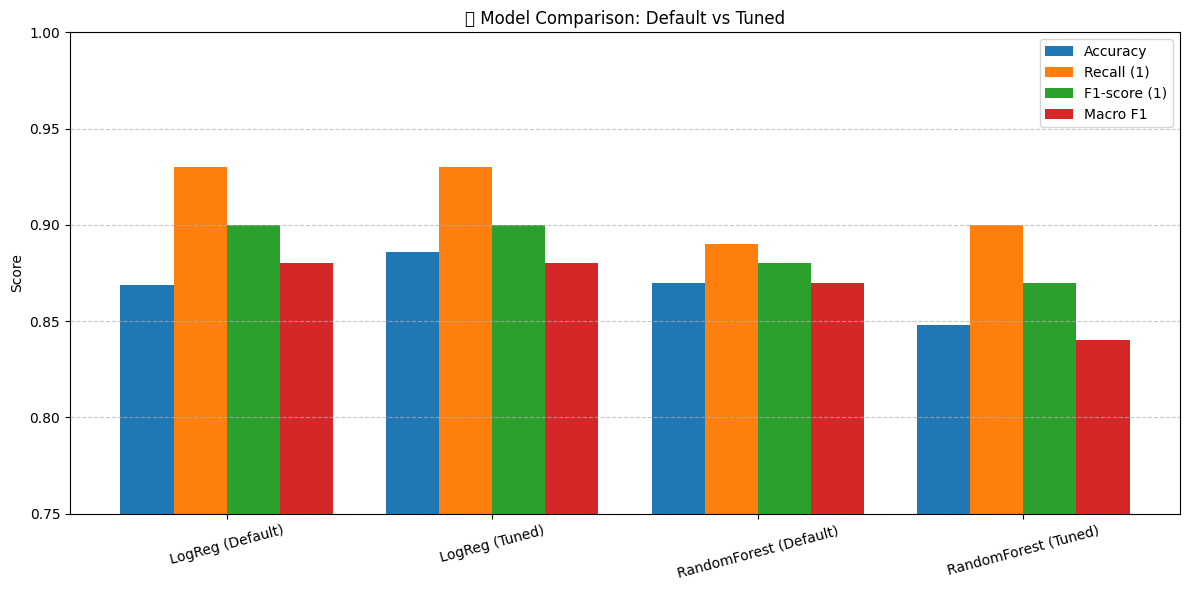

In [27]:
# Model names
labels = [
    'LogReg (Default)',
    'LogReg (Tuned)',
    'RandomForest (Default)',
    'RandomForest (Tuned)'
]

# Accuracy, Recall (class 1), F1-score (class 1), Macro F1
scores = {
    'Accuracy': [0.869, 0.886, 0.870, 0.848],
    'Recall (1)': [0.93, 0.93, 0.89, 0.90],
    'F1-score (1)': [0.90, 0.90, 0.88, 0.87],
    'Macro F1': [0.88, 0.88, 0.87, 0.84]
}

x = np.arange(len(labels))  # model indices
width = 0.2

plt.figure(figsize=(12, 6))

for i, (metric, values) in enumerate(scores.items()):
    plt.bar(x + (i - 1.5) * width, values, width, label=metric)

plt.xticks(x, labels, rotation=15)
plt.ylabel('Score')
plt.title('📊 Model Comparison: Default vs Tuned')
plt.ylim(0.75, 1.0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Logistic Regression is performing better than Random Forest Classifier.